In [212]:
import numpy as np
import pandas as pd
import yfinance as yf
import pypfopt as pf

In [204]:
ativos = yf.download(['IVV','AGG'],start='2005-01-01')['Close']

ativos_retornos = ativos.pct_change().fillna(0)

cov_matrix = ativos_retornos.cov()

vol = ativos_retornos.std()

[*********************100%***********************]  2 of 2 completed


In [214]:
grupo_retornos_anual = []
for i in list(ativos.index.year.unique()):
    grupo_retornos_anual.append(ativos_retornos.loc[ativos_retornos.index.year == i])

In [310]:
retorno_anual_med

Ticker
AGG    0.022949
IVV    0.057413
dtype: float64

In [325]:
pesos_ano = {}

for i in range(len(grupo_retornos_anual)):
    
    ano_x = grupo_retornos_anual[i]

    retorno_anual_med = ano_x.mean()*252

    if  retorno_anual_med.iloc[0] < 0:
        retorno_anual_med.iloc[0] = 0.01

    if  retorno_anual_med.iloc[1] < 0:
        retorno_anual_med.iloc[1] = 0.05

    cov_matrix_ano_x = ano_x.cov()*252
    vol_med_ano_x = ano_x.std()
    

    ef = pf.EfficientFrontier(retorno_anual_med,cov_matrix_ano_x)
    
    weights = ef.max_sharpe()
    
    cleaned_weights = ef.clean_weights()
    pesos_ano[2005+i] = cleaned_weights

    df_pesos_ano = pd.DataFrame(pesos_ano).T

ativos_retornos['Ano'] = ativos_retornos.index.year

df_merged_sharpe = pd.merge(
    ativos_retornos,
    df_pesos_ano,
    how='left',               # mantém o índice/ordem da esquerda
    left_on='Ano',
    right_index=True,
    suffixes=('_Retornos', '_Pesos')
)

# garante que o index final é igual ao do DF left
df_merged_sharpe.index = ativos_retornos.index
df_merged_sharpe.drop(columns=['Ano'],inplace = True)
df_merged_sharpe.tail(4)

df_merged_sharpe['PF'] = (((df_merged_sharpe['AGG_Retornos'] * df_merged_sharpe['AGG_Pesos']) + (df_merged_sharpe['IVV_Retornos'] * df_merged_sharpe['IVV_Pesos']))+1).cumprod()

df_merged_sharpe['PF']

Date
2005-01-03    1.000000
2005-01-04    0.992674
2005-01-05    0.989061
2005-01-06    0.991654
2005-01-07    0.990475
                ...   
2025-12-05    6.408491
2025-12-08    6.396906
2025-12-09    6.391238
2025-12-10    6.414850
2025-12-11    6.418641
Name: PF, Length: 5270, dtype: float64

In [326]:
pesos_ano = {}

for i in range(len(grupo_retornos_anual)):
    
    ano_x = grupo_retornos_anual[i]

    retorno_anual_med = ano_x.mean()*252

    if  retorno_anual_med.iloc[0] < 0:
        retorno_anual_med.iloc[0] = 0.01

    if  retorno_anual_med.iloc[1] < 0:
        retorno_anual_med.iloc[1] = 0.05

    cov_matrix_ano_x = ano_x.cov()*252
    vol_med_ano_x = ano_x.std()
    

    ef = pf.EfficientFrontier(retorno_anual_med,cov_matrix_ano_x)
    
    weights = ef.min_volatility()
    
    cleaned_weights = ef.clean_weights()
    pesos_ano[2005+i] = cleaned_weights

    df_pesos_ano = pd.DataFrame(pesos_ano).T

ativos_retornos['Ano'] = ativos_retornos.index.year

df_merged_vol = pd.merge(
    ativos_retornos,
    df_pesos_ano,
    how='left',               # mantém o índice/ordem da esquerda
    left_on='Ano',
    right_index=True,
    suffixes=('_Retornos', '_Pesos')
)

# garante que o index final é igual ao do DF left
df_merged_vol.index = ativos_retornos.index
df_merged_vol.drop(columns=['Ano'],inplace = True)
df_merged_vol.tail(4)

df_merged_vol['PF'] = (((df_merged_vol['AGG_Retornos'] * df_merged_vol['AGG_Pesos']) + (df_merged_vol['IVV_Retornos'] * df_merged_vol['IVV_Pesos']))+1).cumprod()

df_merged_vol['PF']

Date
2005-01-03    1.000000
2005-01-04    0.998003
2005-01-05    0.997091
2005-01-06    0.998084
2005-01-07    0.997648
                ...   
2025-12-05    2.288740
2025-12-08    2.284962
2025-12-09    2.282912
2025-12-10    2.290505
2025-12-11    2.292909
Name: PF, Length: 5270, dtype: float64

In [327]:
pesos_ano = {}

for i in range(len(grupo_retornos_anual)):
    
    ano_x = grupo_retornos_anual[i]

    retorno_anual_med = ano_x.mean()*252

    if  retorno_anual_med.iloc[0] < 0:
        retorno_anual_med.iloc[0] = 0.01

    if  retorno_anual_med.iloc[1] < 0:
        retorno_anual_med.iloc[1] = 0.05

    cov_matrix_ano_x = ano_x.cov()*252
    vol_med_ano_x = ano_x.std()
    

    ef = pf.EfficientFrontier(retorno_anual_med,cov_matrix_ano_x)
    
    weights = ef._max_return()
    
    cleaned_weights = ef.clean_weights()
    pesos_ano[2005+i] = cleaned_weights

    df_pesos_ano = pd.DataFrame(pesos_ano).T

ativos_retornos['Ano'] = ativos_retornos.index.year

df_merged_return = pd.merge(
    ativos_retornos,
    df_pesos_ano,
    how='left',               # mantém o índice/ordem da esquerda
    left_on='Ano',
    right_index=True,
    suffixes=('_Retornos', '_Pesos')
)

# garante que o index final é igual ao do DF left
df_merged_return.index = ativos_retornos.index
df_merged_return.drop(columns=['Ano'],inplace = True)
df_merged_return.tail(4)

df_merged_return['PF'] = (((df_merged_return['AGG_Retornos'] * df_merged_return['AGG_Pesos']) + (df_merged_return['IVV_Retornos'] * df_merged_return['IVV_Pesos']))+1).cumprod()

df_merged_return['PF']

c:\Users\eduardomoreira\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    

c:\Users\eduardomoreira\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    

c:\Users\eduardomoreira\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_cha

Date
2005-01-03     1.000000
2005-01-04     0.987963
2005-01-05     0.981986
2005-01-06     0.985970
2005-01-07     0.984144
                ...    
2025-12-05    15.418543
2025-12-08    15.372675
2025-12-09    15.360369
2025-12-10    15.459040
2025-12-11    15.415634
Name: PF, Length: 5270, dtype: float64

In [329]:
pesos_ano = {}

for i in range(len(grupo_retornos_anual)):
    
    ano_x = grupo_retornos_anual[i]

    retorno_anual_med = ano_x.mean()*252

    if  retorno_anual_med.iloc[0] < 0:
        retorno_anual_med.iloc[0] = 0.01

    if  retorno_anual_med.iloc[1] < 0:
        retorno_anual_med.iloc[1] = 0.05

    cov_matrix_ano_x = ano_x.cov()*252
    vol_med_ano_x = ano_x.std()
    

    ef = pf.EfficientFrontier(retorno_anual_med,cov_matrix_ano_x)
    
    weights = ef.efficient_risk(0.12)
    
    cleaned_weights = ef.clean_weights()
    pesos_ano[2005+i] = cleaned_weights

    df_pesos_ano = pd.DataFrame(pesos_ano).T

ativos_retornos['Ano'] = ativos_retornos.index.year

df_merged_target = pd.merge(
    ativos_retornos,
    df_pesos_ano,
    how='left',               # mantém o índice/ordem da esquerda
    left_on='Ano',
    right_index=True,
    suffixes=('_Retornos', '_Pesos')
)

# garante que o index final é igual ao do DF left
df_merged_target.index = ativos_retornos.index
df_merged_target.drop(columns=['Ano'],inplace = True)
df_merged_target.tail(4)

df_merged_target['PF'] = (((df_merged_target['AGG_Retornos'] * df_merged_target['AGG_Pesos']) + (df_merged_target['IVV_Retornos'] * df_merged_target['IVV_Pesos']))+1).cumprod()

df_merged_target['PF']

c:\Users\eduardomoreira\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    

c:\Users\eduardomoreira\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning:


    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    

c:\Users\eduardomoreira\AppData\Local\Programs\Python\Python311\Lib\site-packages\cvxpy\reductions\solvers\solving_cha

Date
2005-01-03     1.000000
2005-01-04     0.987963
2005-01-05     0.981986
2005-01-06     0.985970
2005-01-07     0.984144
                ...    
2025-12-05    12.339746
2025-12-08    12.309599
2025-12-09    12.299266
2025-12-10    12.362978
2025-12-11    12.347410
Name: PF, Length: 5270, dtype: float64

<Axes: xlabel='Date'>

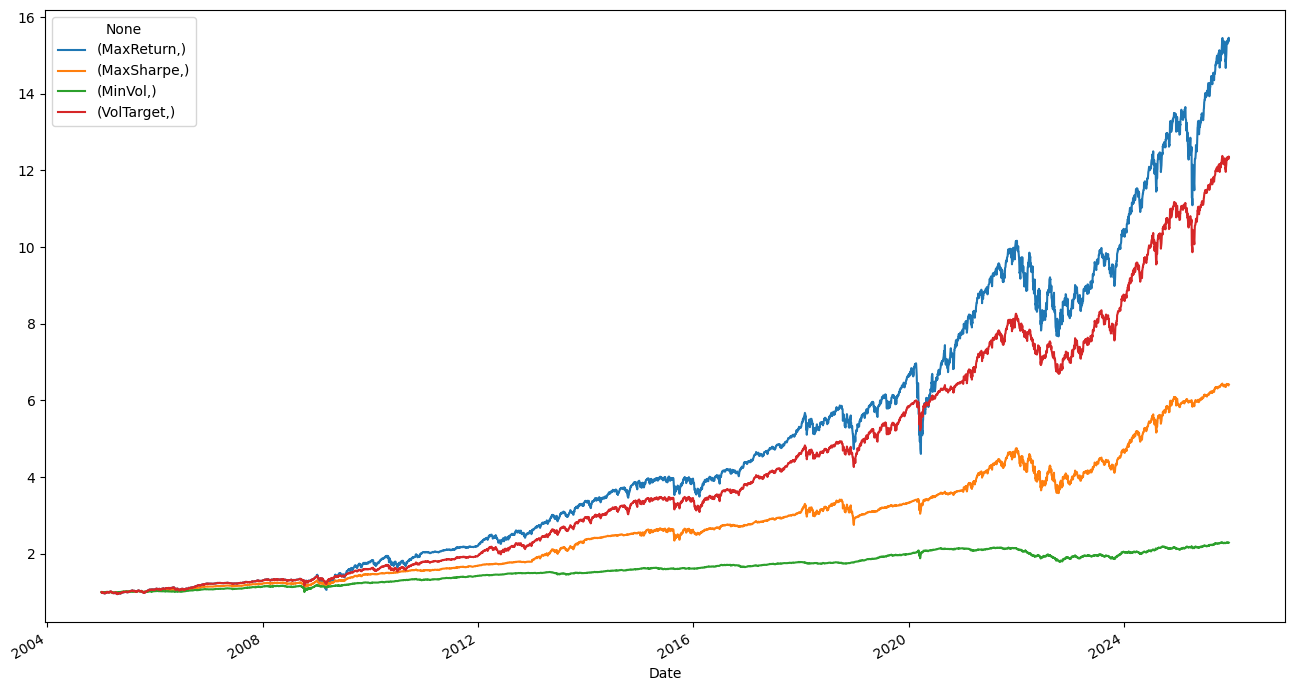

In [337]:
df_geral = pd.concat([df_merged_return['PF'],df_merged_sharpe['PF'],df_merged_vol['PF'],df_merged_target['PF']],axis=1)

df_geral.columns =  [['MaxReturn','MaxSharpe','MinVol','VolTarget']]

df_geral.plot(figsize=(16,9))

In [339]:
df_geral.pct_change().dropna().std()*np.sqrt(252)

MaxReturn    0.159738
MaxSharpe    0.103087
MinVol       0.049568
VolTarget    0.110064
dtype: float64

In [320]:
from arch import arch_model

# ativos_retornos.drop(columns='Ano', inplace = True)

assets = ativos_retornos.columns

sigmas = {}

for asset in assets:
    y = grupo_retornos_anual[-1][asset].dropna()*100
    am = arch_model(y, vol='Garch',p=1,q=1,dist='normal')
    res = am.fit(disp='off')

    forecast = res.forecast(horizon=252)
    sigma_next = np.sqrt(forecast.variance.values[-1,0])/100

    sigmas[asset] = sigma_next

sigmas = pd.Series(sigmas)

D = np.diag(sigmas.values)

R = grupo_retornos_anual[-1].corr()

cov_forecast = D @ R.values @ D
cov_forecast = pd.DataFrame(cov_forecast, index=assets,columns=assets)

mu = grupo_retornos_anual[-1].mean()*252

if  mu.iloc[0] < 0:
    mu.iloc[0] = 0.01

if  mu.iloc[1] < 0:
    mu.iloc[1] = 0.05


ef = pf.EfficientFrontier(mu, cov_forecast)
weights = ef.max_sharpe(risk_free_rate=-1)
cleaned = ef.clean_weights()

print(cleaned)
ef.portfolio_performance(verbose=True)




c:\Users\eduardomoreira\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.08487. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




OrderedDict([('AGG', 0.93328), ('IVV', 0.06672)])
Expected annual return: 8.3%
Annual volatility: 0.2%
Sharpe Ratio: 561.83


c:\Users\eduardomoreira\AppData\Local\Programs\Python\Python311\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:441: UserWarning:

The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.



(0.08300990744801082, 0.0019276350673974093, 561.8334744813671)